In [2]:
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

In [3]:
nb_classes = 10

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, 
                                                labels=Y)
cost = tf.reduce_mean(cost_i)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
training_epochs = 150
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
    
    if epoch % 10 == 0:
        print('Epoch: ', '%04d' % (epoch + 1), '\tcost = ', '{:.9f}'.format(avg_cost))

Epoch:  0001 	cost =  2.788086593
Epoch:  0011 	cost =  0.517101907
Epoch:  0021 	cost =  0.417049655
Epoch:  0031 	cost =  0.371446523
Epoch:  0041 	cost =  0.343929980
Epoch:  0051 	cost =  0.325165614
Epoch:  0061 	cost =  0.311246472
Epoch:  0071 	cost =  0.300508805
Epoch:  0081 	cost =  0.292044824
Epoch:  0091 	cost =  0.285356890
Epoch:  0101 	cost =  0.279289076
Epoch:  0111 	cost =  0.274479890
Epoch:  0121 	cost =  0.270157137
Epoch:  0131 	cost =  0.266644662
Epoch:  0141 	cost =  0.263518509


In [7]:
print("Accuracy: ", accuracy.eval(session=sess,
                                 feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy:  0.9201


Label:  [4]
Prediction:  [4]


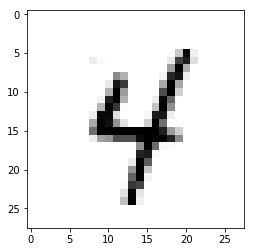

In [25]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1),
                              feed_dict={X: mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()